# Convolutional Neural Networks

The convolutional network is perhaps the most straight forward graphical extension to the multi-layer perceptron (MLP) and one of the most popular classifier networks around. The network works by applying convolutions to each of the layers in an MLP restricting the amount of connections present between layers. First, let's remind ourselves that a convolution between two functions $f$ and $g$ is defined as:

$$ (f \star g) (t) = \int_{-\infty}^{\infty} f(t-s)g(s) ds .$$

The functions are meshed together by applying one as a filter over the other. If, for example, $g$ where a Gaussian it would blur $f$ by averaging it locally proportionally to the Gaussian kernel; the Gaussian decays at long distances and so far away elements of $f$ do not contribute to each other. The convolutional neural network applys this idea of filters or convolutions as operators to the input of the layer: each index is combined in some proportion to neighbouring indexes before being fed-forward through the activation function. Long range indexes are ignored and this greatly reduces the number of parameters per layer.

![Convolutional](./images/convolution.png)

*Convolutional Architecture: Image Reproduced From [https://www.analyticsvidhya.com/blog/2020/10/what-is-the-convolutional-neural-network-architecture/](https://www.analyticsvidhya.com/blog/2020/10/what-is-the-convolutional-neural-network-architecture/).*


CNNs are arbitrarily general (just like MLPs) but they work best when the input information is arranged *topographically* i.e. there is a relationship between the amount of information between two indexes and the distance between them. An example of topologically ordered information is an image: if a given pixel is green then the pixels next to it are likely to green.

## Data Loading
Let's being, as always, by loading and inspecting our data. We will use the shark classification example given in the first lecture and workbook. When we load the images we will do a preprocessing step of downsampling them to a standardised size.

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

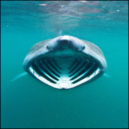
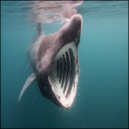
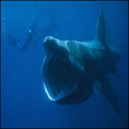
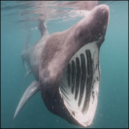
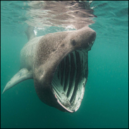
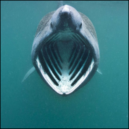
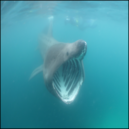
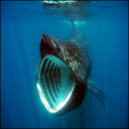
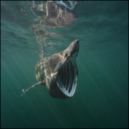
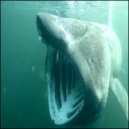
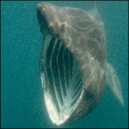
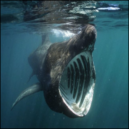
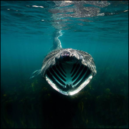
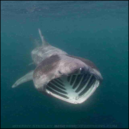
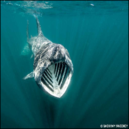
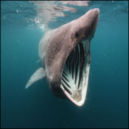
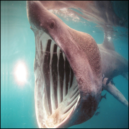
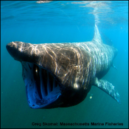
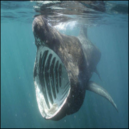
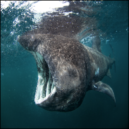
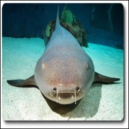
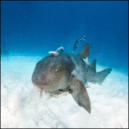
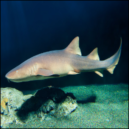
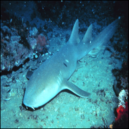
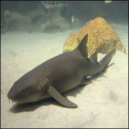
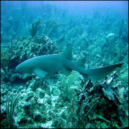
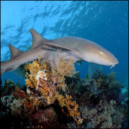
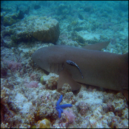
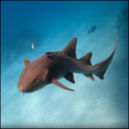
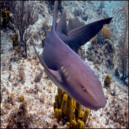
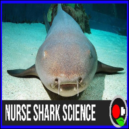
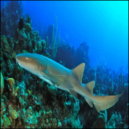
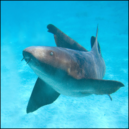
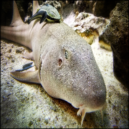
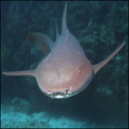
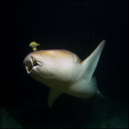
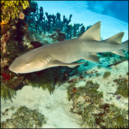
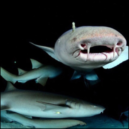
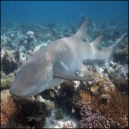
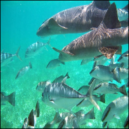
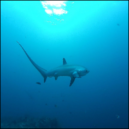
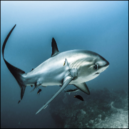
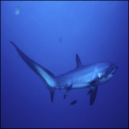
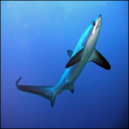
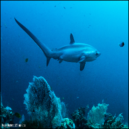
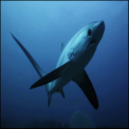
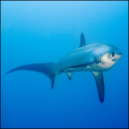
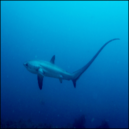
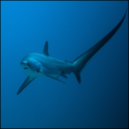
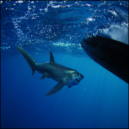
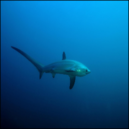
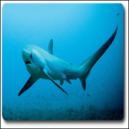
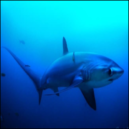
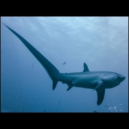
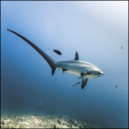
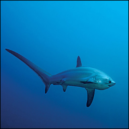
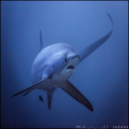
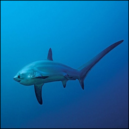
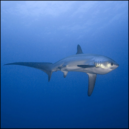
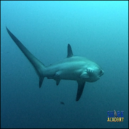

In [1]:
using Images, FileIO, CSV, DataFrames, Zygote, Random, Plots, NNlib
datadirls = readdir("./data/sharks/"); # find the data directories
data_images = []
data_labels = []
for i in datadirls[[1, 8, 10]]
    imgname = readdir("./data/sharks/" * i)
    for j in 1:20
        push!(data_images, imresize(load("./data/sharks/"*i*"/"*imgname[j]), (256,256)))
        push!(data_labels, i)
    end
end
[data_images...]

We now have our data and we can see that there are some sharks. We know that there are three types although it might be difficult to distinguish if we had little experience with sharks. We need to convert this data into an amenable format. This will involve converting the RGB channels into Float32 data. We also would like to shuffle our data. This is generally good practice because training routines will often use mini-batch descent and unshuffled data will be biased towards a single category label for each mini-batch. Finally, we are going to append all of the data into a single tensor with the last dimension of the tensor indicating the datum ID. This is quite a common practice (especially with images) and helps with batching and other generic ML utility procedures: loss functions are typically aggregated along the data dimension.

In [2]:
shuffle = randperm(length(data_images))
data_images = data_images[shuffle]
data_labels = data_labels[shuffle]
function converter(im)
    tens = Array{Float64, 3}(undef, size(im)[1], size(im)[2], 3)
    for i in 1:size(im)[1]
        for j in 1:size(im)[2]
            tens[i, j, 1] = Float32(im[i,j].r)
            tens[i, j, 2] = Float32(im[i,j].g)
            tens[i, j, 3] = Float32(im[i,j].b)
        end
    end
    return tens
end
                
train_size = 40
test_size = 20
                
train_data = zeros(256, 256, 3, train_size)
for i in 1:train_size
    train_data[:,:,:,i] .= converter(data_images[i])
end
train_labels = data_labels[1:train_size];
                
test_data = zeros(256, 256, 3, test_size)
for i in 1:test_size
    test_data[:,:,:,i] .= converter(data_images[train_size + i])
end
test_labels = data_labels[(train_size+1):(train_size+test_size)];

We will also one-hot encode our data labels. This essentially flags the index of the category label and is not *strictly* necessary for our current task. However, having a bitarray label instead of a category label (which could be an emoji, text, image, arbitary data type...) also us to implement generic training methods and loss functions.

In [3]:
labels = unique(data_labels);
train_one_hot_encoding = hcat(map(i -> labels .== i, train_labels)...);
test_one_hot_encoding = hcat(map(i -> labels .== i, test_labels)...);

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

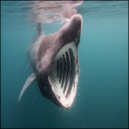
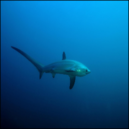
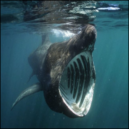
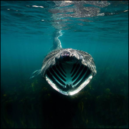
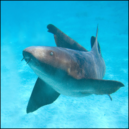
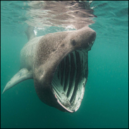
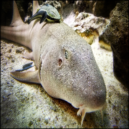
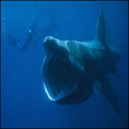
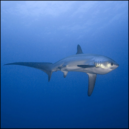
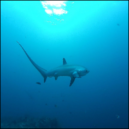
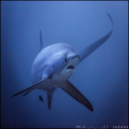
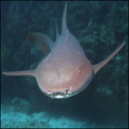
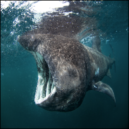
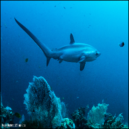
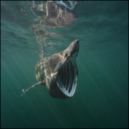
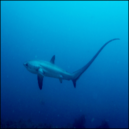
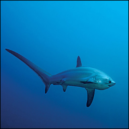
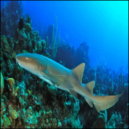
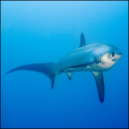
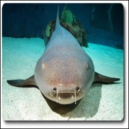
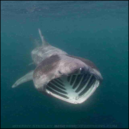
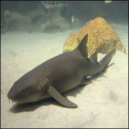
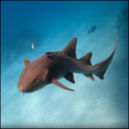
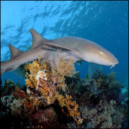
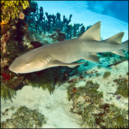
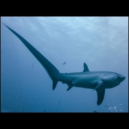
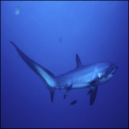
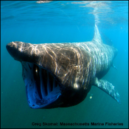
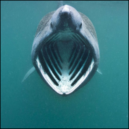
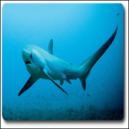
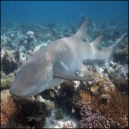
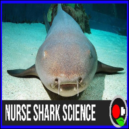
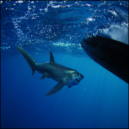
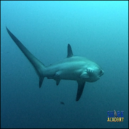
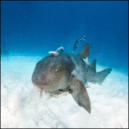
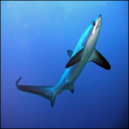
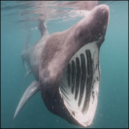
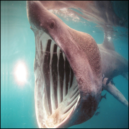
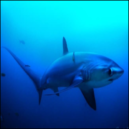
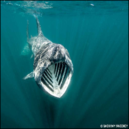
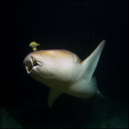
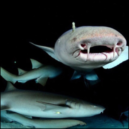
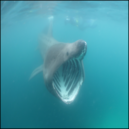
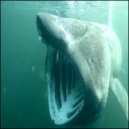
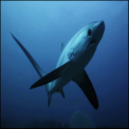
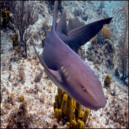
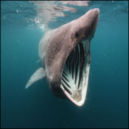
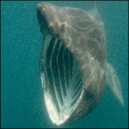
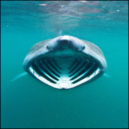
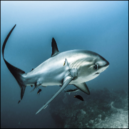
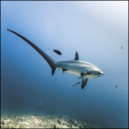
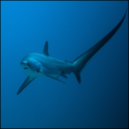
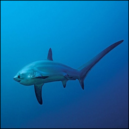
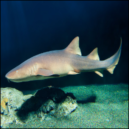
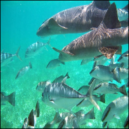
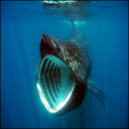
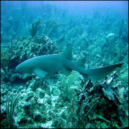
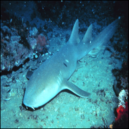
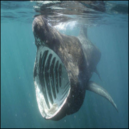
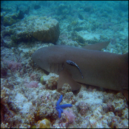

In [4]:
[data_images...]

## Convolution Kernel

### Filters
When defining a CNN we typically choose the filter size (in the dimensions of the input-output data) but we do not specify the weights of each filter; remember that the filter for every potential subset of indexes in a layer will have different weights. The filter is performed by simply taking the Haddamard product (or elementwise product) of the filter with a slice of the input data and summing all the products up. This effectively downsizes a patch of the image into a single datum and corresponds precisely with our mathematical definition of convolution.

We typically call these filters "receptive fields". The origin of this name is from the world of biology, specifically from the visual system. CNNs are actually designed to mimic the topology of the visual system with each layer representing a different layer of the visual system: retina => LGN => V1 => etc. It is no coincidence that these architectures perform well on visual data. Conversely, we might consider that visual systems (convergently) evolved to a network structure that is well adapted to processing topologically arranged data. We might like to consider the implications of this statement for the auditory system where information is also topologically organised, but in a vastly different manner. 
### Strides

We next need to decide how the kernel will migrate across the data - mathematically it is infinitesimially, but we need to specify values computationally. If the kernel moves a single pixel it has a stride of one, two pixels a stride of two and so forth. This affects the dimension which the image is downsized to. We typically dont see strides of larger than two, nor do we see strides larger than the kernel size. 

### Padding

When performing a convolution we have to consider the effect of the boundaries. We typically don't want to *undervalue* the pixels on the boundary but if we do not modify the image these pixels will participate only in a single kernel. To compensate for this we add zeros along the border of a feature and "pad" it out.


### Putting it all together

We specify the filters by the number of output dimensions. We decide on how large the filter will be, how far it will stride, and how much padding it will absorb. We also decide on how many filters our convolutional will have. 

As an example we might consider applying six filters to a 256x256x3 image with 3 RGB channels. We choose the filter size to be 3x3 and the stride to be 2 and ensure that there is 2 pixels of zero padding. Therefore, we upsample to the image to a dimension of 258x258x3 with zeros to pad it out. Then, for each filter we stride across the image with a 3x3x3 cube and take the Haddamard product the cube with each slice of the channel data reducing it to a single number. The reduced dimension will be $\frac{I_d - K_d + 2P_d}{S_d}  + 1$ with $W$ being the input, $K$ being the kernel, $P$ being the padding and $S$ being the stride (convince yourself this is true by drawing a few out). Therefore, in our example, we will have an output tensor of 128x128x12. 

We can think of this output as a 128x128 image with 12 channels, but we more typically refer to these filters as *features*. Alternatively, we can think of an RGB image as an image with 3 features. The final step of creating our convolutional layer is to apply an activation funtion. Let's create our own layer which performs a convolution on an image.

In [5]:
mutable struct Conv
    W
    b
    f
    stride
    padding
    function Conv(nin::Int, nout::Int, kernelsize::Tuple, stride::Tuple, padding::Tuple, activation)
        W = rand(kernelsize..., nin, nout) .- 0.5
        b = rand(nout) .- 0.5
        new(W, b, activation, stride, padding)
    end
end
#. https://github.com/FluxML/NNlib.jl/issues/139
function convolve(input, kernel, padding, stride)
    # we are going to use a convenience function from NNlib
    spatdim = size(kernel)[1:2]
    cdim = DenseConvDims(input, kernel; stride=stride, padding=padding)
    return conv(input, kernel, cdim)
end

function feed_forward(layer::Conv, input)
    batch_convolution = convolve(input, layer.W, layer.padding, layer.stride)
    d1, d2, d3, d4 = size(batch_convolution)    
    B = permutedims(reshape(repeat(layer.b, d1 * d2 * d4), (d3, d1, d1, d4)), (3,2,1,4))
    return layer.f.(batch_convolution .+ B)
end

feed_forward (generic function with 1 method)

## Pooling

Pooling is another downsampling technique that has been employed to great success in convolutional architectures. It is another filter which is applied over the image features with the exception that there is typically no stride - it is configured to tesselate the image. There are two commonly employed pooling techniques: average pooling and max pooling. 

* Average pooling takes the average of all values in the pooling region. In this sense, it is exactly the same as a convolution with stride equal to kernel size and all weights fixed at $1/d$ with $d$ being the dimension. 
* Max pooling takes the maximum value in the pooling region. We might like to think about what this means in terms of a convolution.

Generally, pooling layers are considered to be a downsampling technique and their weights are not trained. In fact, the image resizing that we performed on the data set was itself a form of pooling. The most commonly employed form of pooling is max pooling. Let's create an average pooling layer.

In [6]:
mutable struct Pool
    poolingsize
    pooling_function
    function Pool(poolingsize, pooling_function)
        new(poolingsize, pooling_function)
    end
end

function feed_forward(layer::Pool, input)
    #output = cat(map(t -> cat(map(z -> hcat(map(y -> map(x -> layer.pooling_function(input[x:(x+layer.poolingsize[1]-1), y:(y+layer.poolingsize[2]-1), z, t]), 1:layer.poolingsize[1]:dimsin[1]),1:layer.poolingsize[2]:dimsin[2])...),1:dimsin[3])..., dims=3),1:dimsin[4])..., dims=4)
    return layer.pooling_function(input, layer.poolingsize)
end

feed_forward (generic function with 2 methods)

## Constructing the network

We now have all we need to create our CNN to perform a simple classification tasks. A CNN typically involves a few convolutional layers each followed by their own pooling layer and a final dense layer which learns the classifications. We will use three convolutional layers with features, kernels, strides of (13, 4, 2), (4, 2, 2), and (4,2,1) respectively. We will zero pad each layer to the kernel size. As these are the trainable layers we will keep track of them in a dictionary. We will also use 3x3 max-pooling layers after each of the convolutional layers.

In [7]:
mutable struct Dense
        W
        b
        f
        function Dense(dims::Tuple, nstates, act)
            L = prod(dims)
            W = rand(nstates, L) .- 0.5
            b = rand(nstates) .- 0.5
    
            new(W, b, act)
        end
end

function feed_forward(layer::Dense, input)
    v = reshape(input, (prod(size(input)[1:3]), size(input)[4]))
    res = hcat(map(i -> layer.f.(layer.W * v[:,i] .+ layer.b), 1:size(input)[4])...)
    return res
end

feed_forward (generic function with 3 methods)

In [8]:
relu(x) = x .* (x .> 0)
conv1 = Conv(3, 5, (3,3), (1,1), (0,0), relu);
pool1 = Pool((2,2), NNlib.maxpool);
conv2 = Conv(5, 10, (2,2), (1,1), (0,0), relu);
pool2 = Pool((2,2), NNlib.maxpool);
conv3 = Conv(10, 3, (4,4), (1,1), (0,0), relu);
pool3 = Pool((2,2), NNlib.maxpool);
clas = Dense((2700,1), 3, tanh);

In [9]:
symbols_dict = Dict(1 => conv1, 2 => conv2, 3 => conv3, 4 => clas);

## Training the network

To train the network we will need an appropriate loss function. Fortunately, we have labelled data so this is quite an easy function to define. We are first going to augment our network with a final activation function: the ``softmax`` function. Softmax is defined for a vector $\{v_k : k \in 1:n\}$ as:

$$ \text{softmax}(v_k) = \frac{\exp(v_k)}{\sum_k \exp(v_k)}. $$

It therefore converts the output vector into a vector of probabilities. The loss function can be be defined as the MSE between a one-hot-encoded form of the data, and the vector of probabilities. It could equally be defined as the Hamming distance between the maximal ouput and the one-hot-encoded vector and it would not affect the training dramatically. 

In [10]:
softmax(x::Vector) = exp.(x) ./ sum(exp.(x))
softmax(x::Matrix) = hcat(map(i -> softmax(vec(x[:,i])), 1:size(x)[end])...)

softmax (generic function with 2 methods)

In [11]:
CNN(conv1, conv2, conv3, den,  x) = softmax(feed_forward(den, feed_forward(pool3, feed_forward(conv3, feed_forward(pool2, feed_forward(conv2, feed_forward(pool1, feed_forward(conv1, x))))))))
#CNN(conv1, conv2, conv3, clas, x) = softmax(feed_forward(clas, feed_forward(conv3, feed_forward(conv2, feed_forward(conv1, x)))))
#CNN(conv1, conv2, conv3, clas, x) = feed_forward(clas,feed_forward(conv1, x))

CNN (generic function with 1 method)

The advantage of using ``softmax`` is that we can take the maximal probability to classify the image and also use that probabiltiy to give an indication of certainty that the network has about this prediction. This has a myriad of problems, namely neural networks being overly certain, but it also is beneficial. For example, consider a cell image being classified as "cancerous" with 20% certaintity, or 98% certainty. In the second case we might communicate a sense of dire urgency to a practitioner while in the first case we might "flag" it for review.

We now need to define the loss function, a batched training function, the gradient, and the training routine. We will use ``adam`` as the optimiser and stick to the default hyper-parameters. We will stick to our (rather clunky) dictionary ``P`` to keep track of the momemtum vectors for the ``adam`` optimiser. We will train it for 100 epochs or until the loss falls below $10^{-3}$. 

In [12]:
function L(conv1, conv2, conv3, clas, dat, one_hot)
    # try logit crossentropy loss 
    sfm = CNN(conv1, conv2, conv3, clas, dat)
    #return sum(sfm .* one_hot) ./ size(one_hot)[end]
    return sum((sfm .- one_hot) .^ 2)
end

function trainable(conv1, conv2, conv3, clas; batch_size=5)
    samp = rand(1:size(train_data)[end], batch_size)
    loss = L(conv1, conv2, conv3, clas, train_data[:,:,:, samp], train_one_hot_encoding[:,samp])
    return loss
end

gradT(conv1, conv2, conv3, den) = Zygote.gradient(trainable, conv1, conv2, conv3, den)

function adam(g, v, m, t; eta=0.001, alpha=0.9, beta1=0.99, beta2=0.999)
    m .= beta1 .* m .+ (1 .- beta1) .* g
    v .= beta2 .* v .+ (1 .- beta2) .* g .^ 2
    return eta .* sqrt(1 .- beta2^t)/(1 .- beta1^t) .* m ./ (sqrt.(v) .+ 10^-7)
end

function train!(conv1, conv2, conv3, clas, P, t; eta=0.001)
    # train the parameters by taking the gradient and applying ADAM over each of the fields.
    g = gradT(conv1, conv2, conv3, clas)
    for j in 1:length(g)
            symbols_dict[j].W .= symbols_dict[j].W .- adam(g[j][:W], P[j][:m][:W], P[j][:v][:W], t; eta=eta)
            symbols_dict[j].b .= symbols_dict[j].b .- adam(g[j][:b], P[j][:m][:b], P[j][:v][:b], t; eta=eta)
    end
    return nothing
end

train! (generic function with 1 method)

In [13]:
function new_train()
    P = Dict()

    for j in 1:length(symbols_dict)
        P[j] = Dict()
        P[j][:m] = Dict()
        P[j][:v] = Dict()
    end

    for j in 1:length(symbols_dict)
            P[j][:m][:W] = zeros(size(symbols_dict[j].W))
            P[j][:m][:b] = zeros(size(symbols_dict[j].b))
            P[j][:v][:W] = zeros(size(symbols_dict[j].W))
            P[j][:v][:b] = zeros(size(symbols_dict[j].b))
    end

    return P
end

new_train (generic function with 1 method)

In [14]:
function train_network(Laccept, epochs_max; train_new=true, batch_size=5)
    if train_new
        P = new_train()
    end
    
    t0 = time()
    epoch_length = ceil(Int, size(train_data)[end]/batch_size)
    iter_max = epochs_max * epoch_length
    lt = [L(conv1, conv2, conv3, clas, train_data, train_one_hot_encoding)]
    lv = [L(conv1, conv2, conv3, clas, test_data, test_one_hot_encoding)]
    t = 1
    ep = 1
    try 
    while (t < iter_max) && (lt[end] > Laccept)
        t += 1
        ep = ceil(Int, t/epoch_length)
        telap = time() - t0
        train!(conv1, conv2, conv3, clas, P, t)
        append!(lt, L(conv1, conv2, conv3, clas, train_data, train_one_hot_encoding))
        append!(lv, L(conv1, conv2, conv3, clas, test_data, test_one_hot_encoding))
        p = plot(1:t, lt; title="Training Loss (train% = $(round(100*t/iter_max, digits=2)), time = $(round(telap, digits=2)) seconds)", label="Log Loss: Training Set")
        plot!(p, 1:t, lv; label="Log Loss: Test Set")
        IJulia.clear_output(true)
        display(p)
    end
    return P
    catch y
        display(y)
        display("Training interupted at epoch $(ep) with a loss of $(lt[end]).")
    end
end 

train_network (generic function with 1 method)

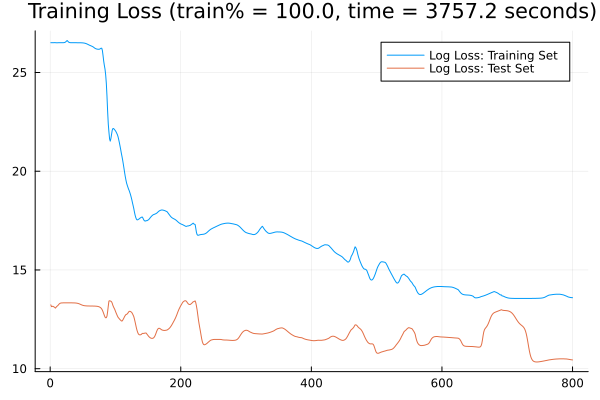

Dict{Any, Any} with 4 entries:
  4 => Dict{Any, Any}(:m=>Dict{Any, Any}(:b=>[0.118375, 0.0127895, 0.240032], :…
  2 => Dict{Any, Any}(:m=>Dict{Any, Any}(:b=>[0.181583, 1.99512e-5, 0.00679917,…
  3 => Dict{Any, Any}(:m=>Dict{Any, Any}(:b=>[1.54959, 4.30479e-5, 0.130573], :…
  1 => Dict{Any, Any}(:m=>Dict{Any, Any}(:b=>[0.000498612, 2.66368, 0.00323938,…

In [15]:
train_network(0.001, 100)

The final step is to compare our trained model to our untrained validation test set. We can define a ``onecold`` function to map a batch of data from a one hot encoded output. Then, we can simply compare directly against the test labels and see what fraction we got correct.

In [113]:
function onecold(dat, labels)
    pred = CNN(conv1, conv2, conv3, clas, dat)
    return map(i -> labels[argmax(vec(pred[:,i]))], 1:size(pred)[end])
end

onecold (generic function with 1 method)

In [114]:
sum(onecold(test_data, labels) .== test_labels)/length(test_labels)

0.85